<a href="https://colab.research.google.com/github/DavidStrickland19/Bird-Image-Recongnition-Project/blob/main/Bird_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we look to create a deep learning model that can recongnize 10 different types of birds local to Maryland. Roughly 200-300 pictures of each bird will be used for the training set. The chrome extension Fatkun was used to pull/download all of the bird images.

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
#Make sure fast ai is up to date
!curl -s http://course.fast.ai/setup/colab | bash

In [ ]:
#Normal imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
#Allow to create folders and pull from google drive
from google.colab import drive

In [ ]:
from fastai.vision import *

In [ ]:
#access my google drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
#save path  to project folder where this project is hosted
root_path = 'gdrive/MyDrive/D_Science_Projects/newbirds/birds.zip'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#permissions
from google.colab import auth
auth.authenticate_user()

In [ ]:
!unzip -u '/content/drive/MyDrive/D_Science_Projects/newbirds/birds.zip' -d "/content/drive/My Drive/D_Science_Projects/newbirds"

In [ ]:
#Go to project path

project_path =  '/content/drive/MyDrive/D_Science_Projects/newbirds/birds'


In [ ]:
#Listing all folders we have
folders = ['baltimore oriole, osprey, bald eagle, great blue heron, prothonotary warbler, black skimmer, common raven, brown pelican, redhead, chimney swift ']

In [ ]:
#create a fast AI path variable
p_path = Path(project_path)


Scale all images to be the same size and be square(224 commonly used size for DL models). Use this data as our train nr test set. Split 80/20. Transform Data - Stretch, flip, etc. Normalize Data.

In [ ]:
#checking where path is
from pathlib import Path
import os
path = os.getcwd()
path = Path.cwd()
print(path)


/content


In [ ]:
from fastai.vision.data import ImageList
il = ImageList.from_folder(path)

In [ ]:
il[0]

In [ ]:
valid_pct = 0.2
src = il.split_by_rand_pct(valid_pct)

In [ ]:
src.train[0]

In [ ]:
src = src.label_from_folder()

In [ ]:
from fastai.vision.transform import get_transforms
tfms = get_transforms()
src.transform(tfms, size=224);

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


In [ ]:
data = src.databunch()

In [ ]:
#Last step of transforming data
np.random.seed(42)
from fastai.vision.transform import get_transforms
from fastai.vision.data import ImageDataBunch
data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
#All my birds folders
data.classes

['MyDrive',
 'bald eagle',
 'baltimore oriole',
 'black skimmer',
 'brown pelican',
 'chimney swift',
 'common raven',
 'great blue heron',
 'osprey',
 'prothonotary warbler',
 'redhead']

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

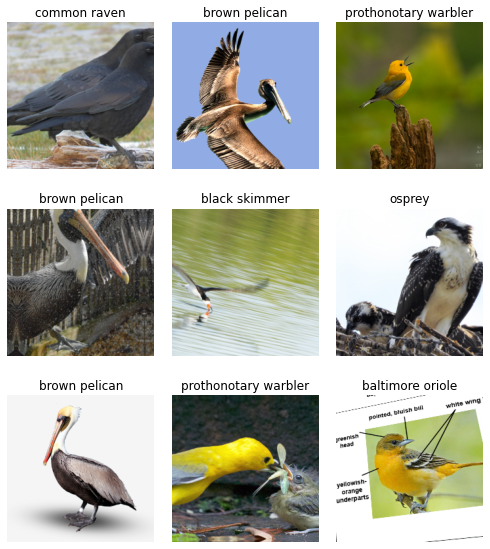

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
#train/test numbers
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['MyDrive',
  'bald eagle',
  'baltimore oriole',
  'black skimmer',
  'brown pelican',
  'chimney swift',
  'common raven',
  'great blue heron',
  'osprey',
  'prothonotary warbler',
  'redhead'],
 11,
 3714,
 928)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
#showing the run time and error for each time the data set was passed through the DL algorithm
 learn.fit_one_cycle(8)

Run time should be around 10 seconds for every training set passed through the learining algorithm. But we are seeing runtimes of 12 minutes for each runtime. Project still in progress. Once we figure out how to make the runtime faster, we can coomplete the analysis of this project.